![Screenshot%202021-11-16%20at%2019.31.48.png](images/HCDR-logo.png)
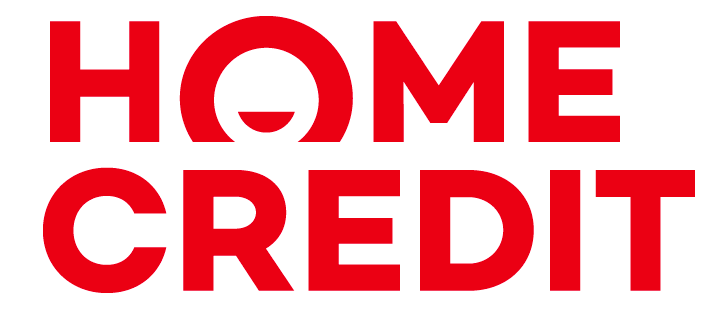

# Team and project meta information.

<h2>Canvas Group: FinalProject_Fall2021 25<br><br>
    Move 78 Team Members:</h2>

![Edited%20team%20photo.png](images/Edited%20team%20photo.png)
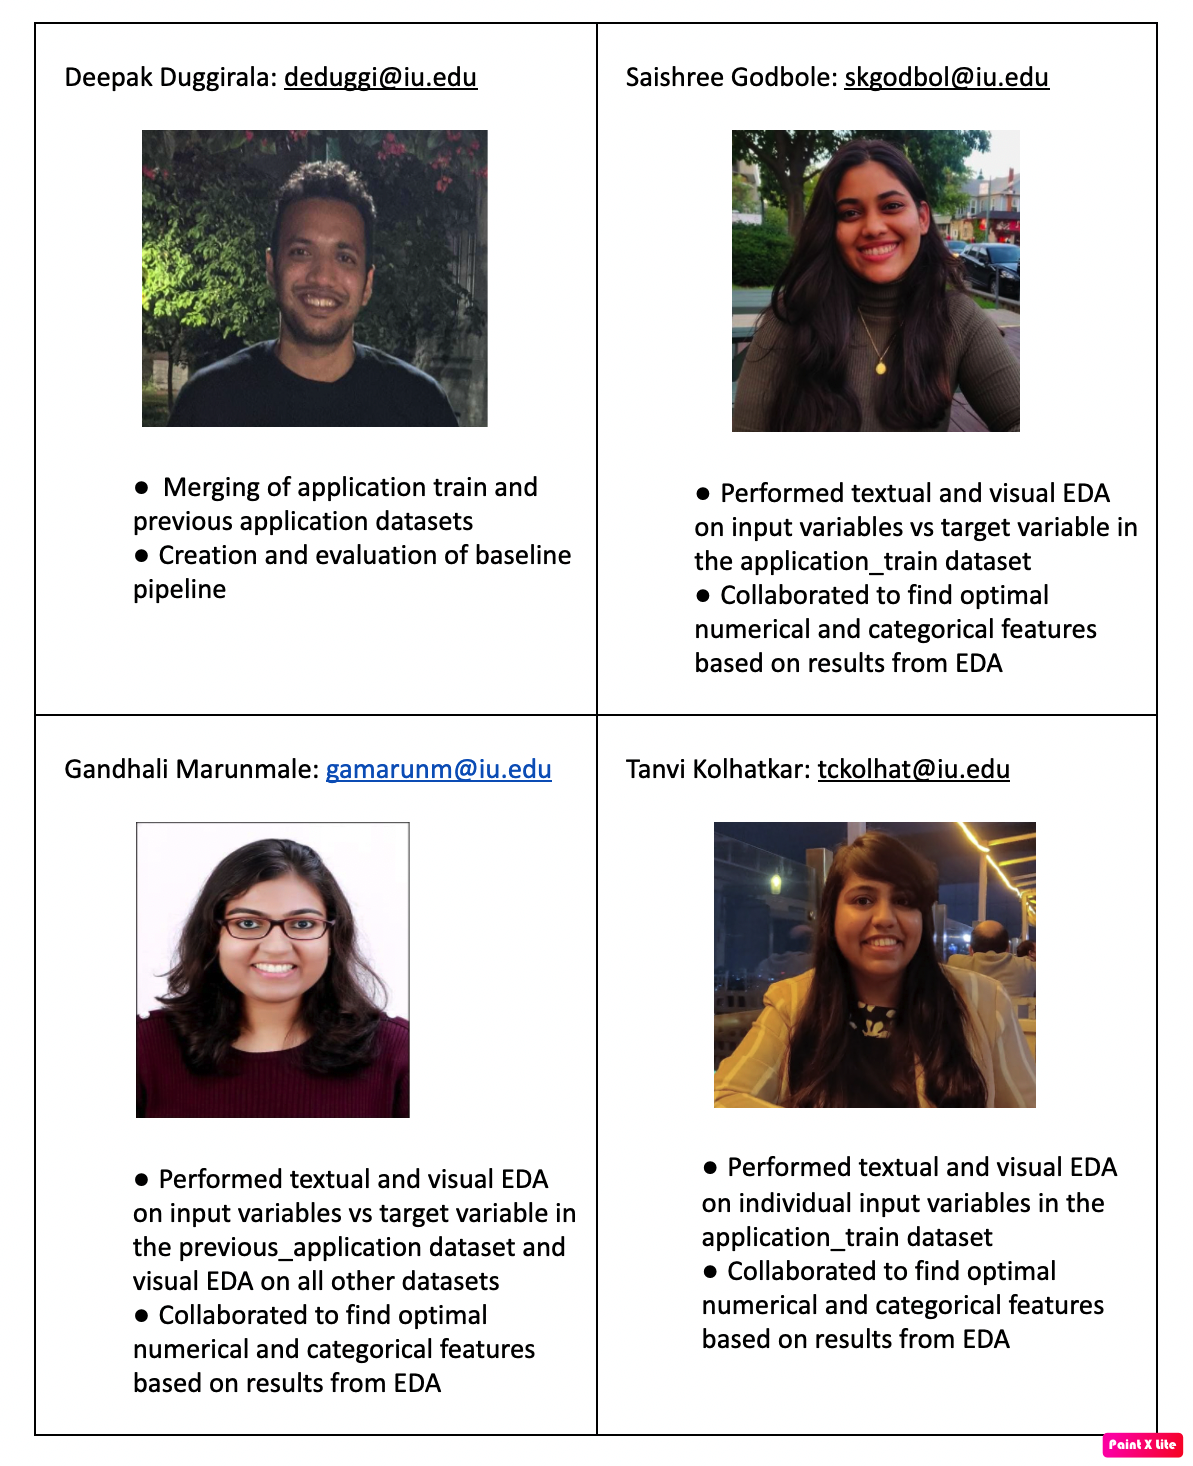

# Project Abstract

This phase of the project focuses on performing EDA on data attributes, creation and evaluation of the base pipeline and a Kaggle submission. To achieve the first section, we have explored the different datasets with the help of distribution and correlation plots.<br>
We have split the exploratory data analysis phase into two parts: Text and Visual Analysis. For the second section, we have used Logistic Regression as our base model. We have split the datasets into numerical and categorical features to be separately preprocessed, created the main pipeline with Logistic Regression and evaluated it using Area under the Curve (AUC) measure. We then submitted our model on Kaggle to receive a score of 0.73319.<br>
Our findings show evidence for a higher loan repayment given a candidate with credit amount between 0 and 100K, having an age range of 34-52, is married and is employed for more than 3years.<br>
In the next phase of the project, we will be employing an ensemble of supervised classification algorithms ranging from simple models like Logistic Regression to complex Gradient Boosted Decision Trees and Random Forest Classifier models.


# Project Description

<b>Data Description:</b>

We are using Home Credit Default Risk Dataset. This dataset contains 7 sources describing a person's current loan application, previous applications with the Home Credit financial institute and the credit history with the bureau.  The target is a binary variable describing whether applicants repaid or defaulted / late repay on their loans.

<b>Tasks</b>

![Screenshot%202021-11-16%20at%2019.37.12.png](images/Screenshot%202021-11-16%20at%2019.37.12.png)
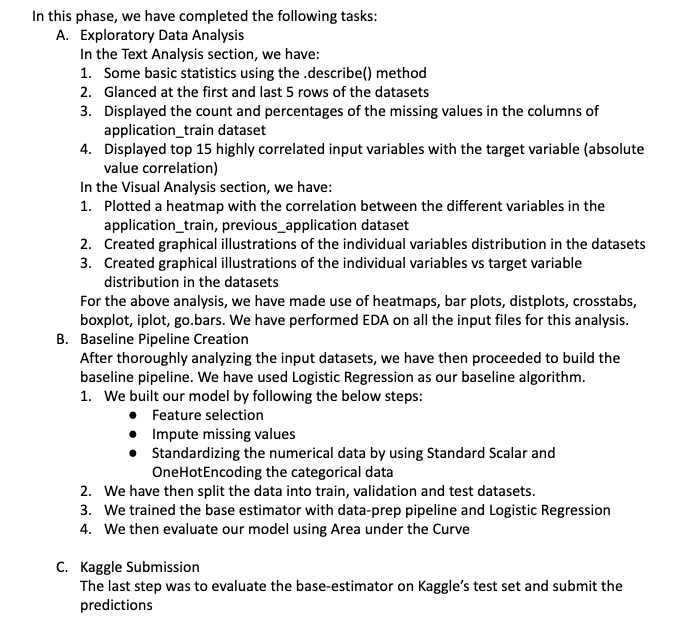

<b>Workflow Diagram:

We have illustrated the above tasks in the form of a work flow diagram</b>

![workflow.drawio%20%281%29.png](images/workflow-drawio.png)
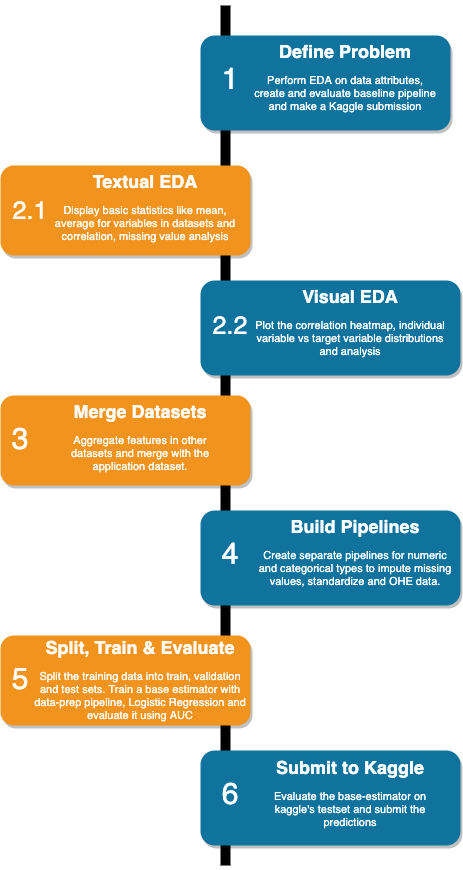

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! head drive/MyDrive/home-credit-default-risk/application_train.csv

### Utils

In [3]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    return df

def load_datasets(DATA_DIR, ds_names):
    datasets = {}
    for ds_name in ds_names:
        datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
    return datasets
    
def pct(x):
    return round(100*x,3)

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Load Data

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [5]:
DATA_DIR = "../../../Data/home-credit-default-risk"
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

datasets = load_datasets(DATA_DIR, ds_names)

# Exploratory Data Analysis

## Text Analysis

We begin the EDA by analysing data from Application(Main) Table and all supporting tables. The analysis covers the summary for each table, its data distribution, feature differentiation and correlation.

### Application Train Dataset

In [6]:
dataset = datasets['application_train']

In [7]:
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Shows the first 5 rows of the aplication train dataset.

In [8]:
dataset.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


Shows the last 5 rows of the aplication train dataset.

In [9]:
dataset.shape

(307511, 122)

In [10]:
dataset.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

The dataset has 307511 rows and 122 columns.

In [11]:
dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We next have a look at some statistics on each numerical feature of the application training dataset.

In [12]:
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = dataset.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


Taking a look at the count and percentage of missing values in the training dataset. 

In [13]:
numerical_ix = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = dataset.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXP

In [14]:
corr = dataset.corr()
# print(corr.unstack().sort_values())
print(corr["TARGET"].abs().sort_values(ascending=False).nlargest(n=15))

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64


### Previous Application Dataset

In [15]:
previous_application = datasets['previous_application']                              

In [16]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [18]:
previous_application.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


In [19]:
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = previous_application.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
AMT_DOWN_PAYMENT,53.64,895844
RATE_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_TERMINATION,40.30,673065
DAYS_LAST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065
DAYS_FIRST_DUE,40.30,673065


In [20]:
numerical_ix = previous_application.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = previous_application.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

Categorical features: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


### Bureau Dataset

In [21]:
bureau = datasets['bureau']                   

In [22]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [23]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [24]:
bureau.describe(include='all')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1716428,1716428,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1716428,1.716428e+06,4.896370e+05
unique,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN
top,NaN,NaN,Closed,currency 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer credit,NaN,NaN
freq,NaN,NaN,1079273,1715020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1251615,NaN,NaN
mean,2.782149e+05,5.924434e+06,NaN,NaN,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,NaN,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,NaN,NaN,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,NaN,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,NaN,NaN,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,NaN,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,NaN,NaN,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,NaN,NaN,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,NaN,NaN,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,NaN,-3.300000e+01,1.350000e+04


In [25]:
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = bureau.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
AMT_ANNUITY,71.47,1226791
AMT_CREDIT_MAX_OVERDUE,65.51,1124488
DAYS_ENDDATE_FACT,36.92,633653
AMT_CREDIT_SUM_LIMIT,34.48,591780
AMT_CREDIT_SUM_DEBT,15.01,257669
DAYS_CREDIT_ENDDATE,6.15,105553
AMT_CREDIT_SUM,0.00,13
CREDIT_ACTIVE,0.00,0
CREDIT_CURRENCY,0.00,0
DAYS_CREDIT,0.00,0


In [26]:
numerical_ix = bureau.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = bureau.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

Categorical features: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


### Bureau Balance Dataset

In [27]:
bureau_balance = datasets['bureau_balance']

In [28]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [29]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [30]:
bureau_balance.describe(include='all')

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.729992e+07,2.729992e+07,27299925
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,13646993
mean,6.036297e+06,-3.074169e+01,NaN
std,4.923489e+05,2.386451e+01,NaN
min,5.001709e+06,-9.600000e+01,NaN
25%,5.730933e+06,-4.600000e+01,NaN
50%,6.070821e+06,-2.500000e+01,NaN
75%,6.431951e+06,-1.100000e+01,NaN


In [31]:
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = bureau_balance.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
SK_ID_BUREAU,0.0,0
MONTHS_BALANCE,0.0,0
STATUS,0.0,0


In [32]:
numerical_ix = bureau_balance.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = bureau_balance.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_BUREAU', 'MONTHS_BALANCE']

Categorical features: ['STATUS']


### POS CASH Balance Dataset

In [33]:
POS_CASH_balance = datasets['POS_CASH_balance']

In [34]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [35]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [36]:
POS_CASH_balance.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,10001358,1.000136e+07,1.000136e+07
unique,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9151119,NaN,NaN
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,NaN,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,NaN,0.000000e+00,0.000000e+00


In [37]:
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = POS_CASH_balance.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
CNT_INSTALMENT_FUTURE,0.26,26087
CNT_INSTALMENT,0.26,26071
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
MONTHS_BALANCE,0.00,0
NAME_CONTRACT_STATUS,0.00,0
SK_DPD,0.00,0
SK_DPD_DEF,0.00,0


In [38]:
numerical_ix = POS_CASH_balance.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = POS_CASH_balance.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

Categorical features: ['NAME_CONTRACT_STATUS']


### Installment Payments Dataset

In [39]:
installments_payments = datasets['installments_payments']

In [40]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [41]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [42]:
installments_payments.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [43]:
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = installments_payments.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
DAYS_ENTRY_PAYMENT,0.02,2905
AMT_PAYMENT,0.02,2905
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
NUM_INSTALMENT_VERSION,0.00,0
NUM_INSTALMENT_NUMBER,0.00,0
DAYS_INSTALMENT,0.00,0
AMT_INSTALMENT,0.00,0


In [44]:
numerical_ix = installments_payments.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = installments_payments.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']

Categorical features: []


### Credit Card Balance Dataset

In [45]:
credit_card_balance = datasets['credit_card_balance']

In [46]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [47]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [48]:
credit_card_balance.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3840312,3.840312e+06,3.840312e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698436,NaN,NaN
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,NaN,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,NaN,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,NaN,0.000000e+00,0.000000e+00


In [49]:
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = credit_card_balance.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
AMT_PAYMENT_CURRENT,20.00,767988
AMT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_DRAWINGS_POS_CURRENT,19.52,749816
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816
AMT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_INSTALMENT_MATURE_CUM,7.95,305236
AMT_INST_MIN_REGULARITY,7.95,305236
SK_ID_PREV,0.00,0


In [50]:
numerical_ix = credit_card_balance.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = credit_card_balance.select_dtypes(include=['object', 'bool']).columns
print(f"Numerical   features: {list(numerical_ix)}\n")
print(f"Categorical features: {list(categorical_ix)}")

Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']

Categorical features: ['NAME_CONTRACT_STATUS']


## Visual Analysis

### Application Train Dataset

Text(0.5, 1.0, '15 attributes that highly correlate with Target')

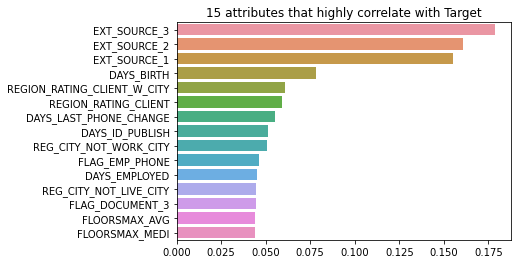

In [51]:
import seaborn as sns
x=corr['TARGET'].drop('TARGET').abs().sort_values(ascending=False).nlargest(n=15)
ax = sns.barplot(y=x.index, x=x.values)
ax.set_title("15 attributes that highly correlate with Target")

Plotting the top 15 absolute values in the correlation matrix which have the highest impact on the target variable.
This acts as a rough guide for further analysis of the input variables.

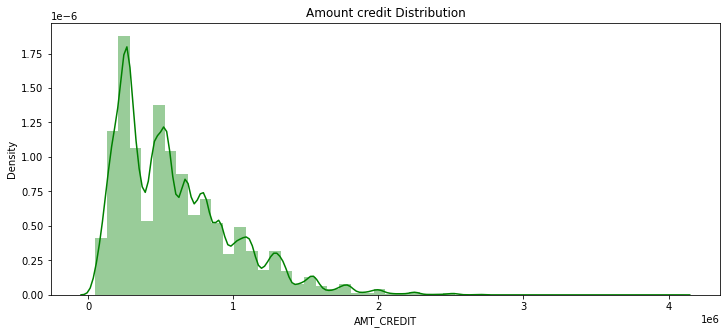

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
plt.title("Amount credit Distribution")
plt.xlabel("Credit Amount")
ax = sns.distplot(datasets["application_train"]["AMT_CREDIT"], color="g")

There is a higher distribution of people who have credit amount between 0 to $10,00,000.

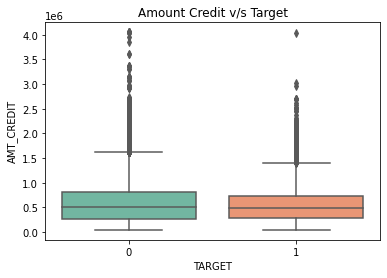

In [53]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=dataset, palette="Set2")
plt.title('Amount Credit v/s Target')
plt.show()

The majority distribution of the credit amount for both target values has a median around $50K with an interquartile range of 50K dollars for applicants who repayed the loan and 40K dollars for defaulters.

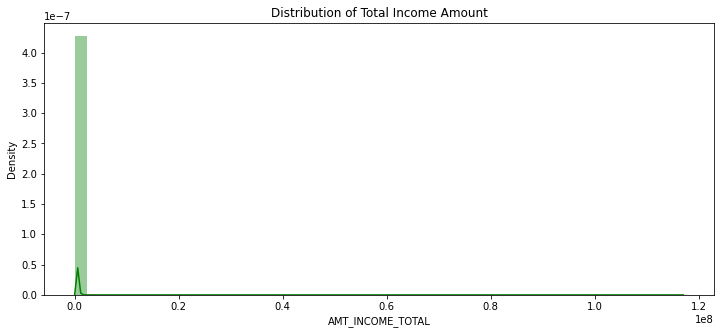

In [54]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Total Income Amount")
plt.xlabel("Total Income Amount")
ax = sns.distplot(datasets["application_train"]["AMT_INCOME_TOTAL"], color="g")

There is a higher distribution of people who have total income amount between 0 to $10,00,00,000.

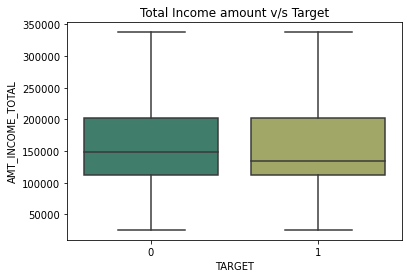

In [55]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=dataset, showfliers = False,palette="gist_earth")
plt.title('Total Income amount v/s Target')
plt.show()

We can observe from the plotted box plots that the median income of applicants who repayed is higher than that of those who defaulted.

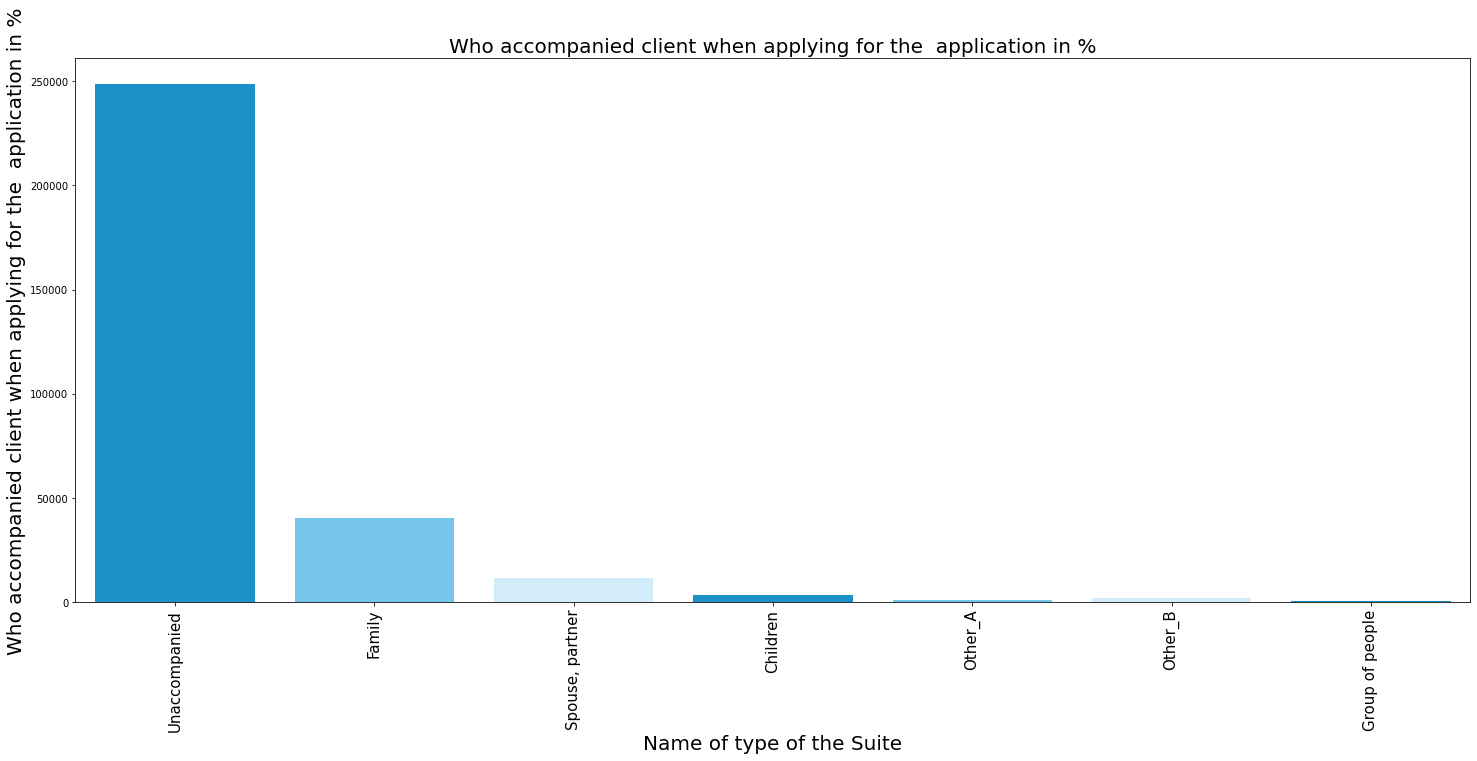

In [56]:
plt.figure(figsize=(25,10))
sns.countplot(x='NAME_TYPE_SUITE', data=datasets["application_train"], palette=['#0099e6',"#66ccff","#cceeff"]);
plt.title('Who accompanied client when applying for the  application in %',fontsize=20);
plt.xlabel("Name of type of the Suite",fontsize=20)
plt.ylabel("Who accompanied client when applying for the  application in %",fontsize=20)
plt.xticks(rotation=90,fontsize=15);

The highest number of applicants were unaccompanied and the second highest number of applicants were accompanied by their family.

Text(0, 0.5, 'Count of people who repaid loan')

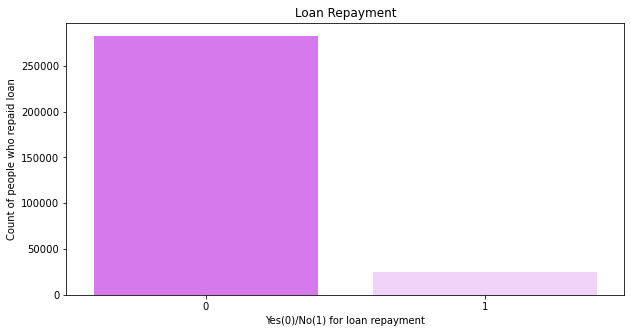

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x='TARGET', data=datasets["application_train"], palette=['#e066ff',"#f5ccff"]);
plt.title('Loan Repayment');
plt.xlabel("Yes(0)/No(1) for loan repayment")
plt.ylabel("Count of people who repaid loan")

There were very less defaulters, just ~8%, out of the total number of loan applicants.

Text(0, 0.5, 'Count of the different types of loan')

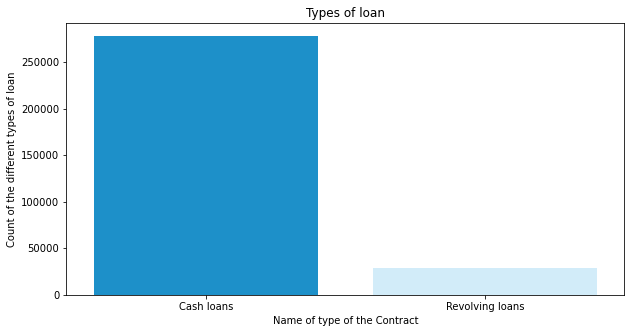

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_CONTRACT_TYPE', data=datasets["application_train"], palette=['#0099e6',"#cceeff"]);
plt.title('Types of loan');
plt.xlabel("Name of type of the Contract")
plt.ylabel("Count of the different types of loan")

There were 90% more applications for cash loans than revolving loans.

Text(0, 0.5, 'Count of car owners')

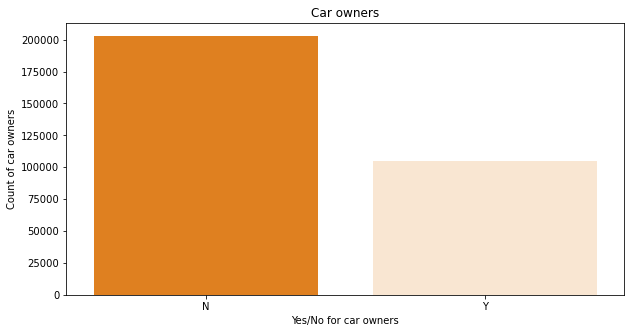

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='FLAG_OWN_CAR', data=datasets["application_train"], palette=['#ff8000',"#ffe6cc"]);
plt.title('Car owners');
plt.xlabel("Yes/No for car owners")
plt.ylabel("Count of car owners")

There are a higher number of applicants (almost 65%) who did not own cars.

Text(0.5, 1.0, 'Number of car owners with Target variable(0/1)')

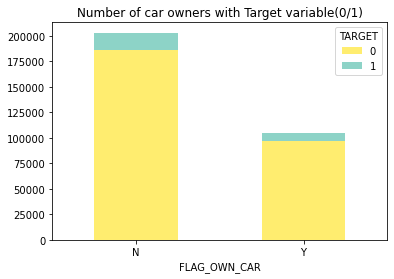

In [60]:
plot1 = pd.crosstab(dataset['FLAG_OWN_CAR'],dataset['TARGET'])
ax = plot1.plot(kind='bar', stacked=True, rot=0, colormap = 'Set3_r')
plt.title('Number of car owners with Target variable(0/1)')

Number of car owners is almost half of non-car owners. Percentage of defaulters in both cases are relatively low.

Text(0, 0.5, 'Count of property owners')

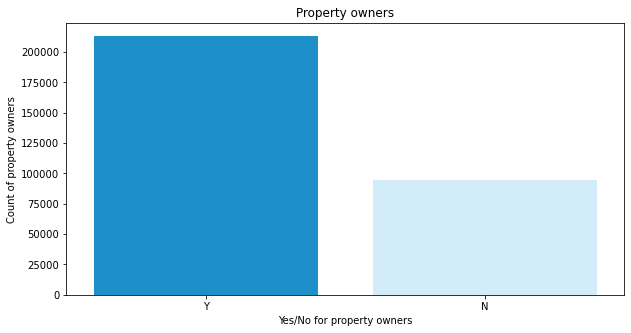

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='FLAG_OWN_REALTY', data=datasets["application_train"], palette=['#0099e6',"#cceeff"]);
plt.title('Property owners');
plt.xlabel("Yes/No for property owners")
plt.ylabel("Count of property owners")

There are a higher number of applicants (almost 60%) who owned property.


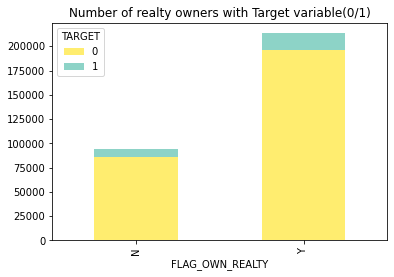

In [62]:
plot2 = pd.crosstab(dataset['FLAG_OWN_REALTY'],dataset['TARGET']).plot.bar(stacked=True,colormap = 'Set3_r')
plt.title('Number of realty owners with Target variable(0/1)')
plt.show()

Number of non-realty owners is almost half of realty owners. Percentage of defaulters in both cases are relatively low.
The probablity of an applicant owning a car is lower than that of owning real estate

Text(0, 0.5, 'count')

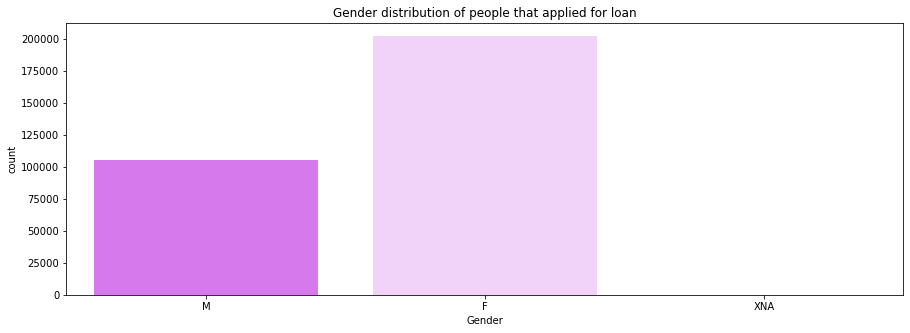

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(x='CODE_GENDER', data=datasets["application_train"], palette=['#e066ff',"#f5ccff"]);
plt.title('Gender distribution of people that applied for loan');
plt.xlabel("Gender")
plt.ylabel("count")

There are a higher number of female applicants than male applicants.

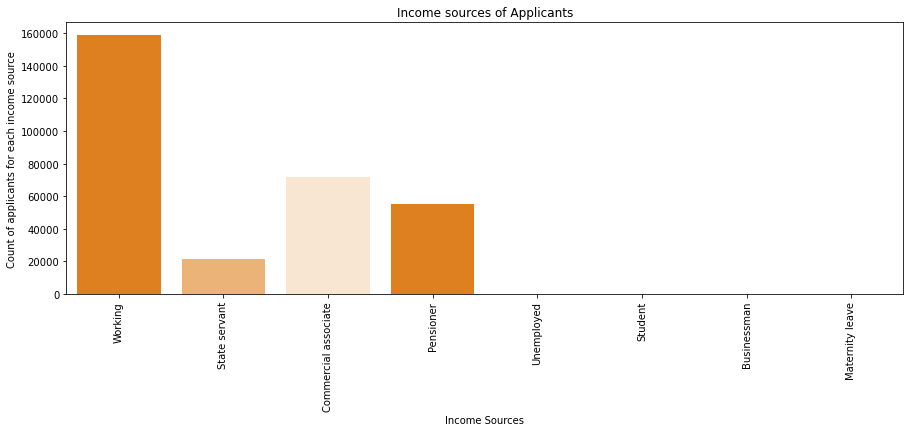

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_INCOME_TYPE', data=datasets["application_train"], palette=['#ff8000',"#ffb366","#ffe6cc"]);
plt.title('Income sources of Applicants');
plt.xlabel("Income Sources")
plt.ylabel("Count of applicants for each income source")
plt.xticks(rotation=90);

The highest number of applicants are 'working' and the second highest number of applicants are 'commercial associates' and then 'pensioners'.


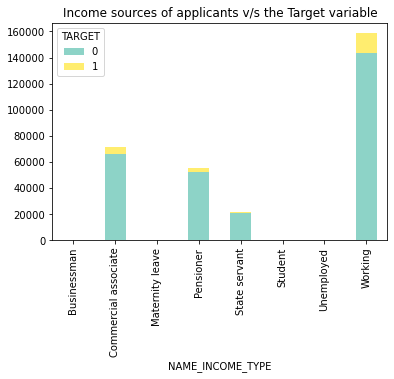

In [65]:
plot2 = pd.crosstab(dataset['NAME_INCOME_TYPE'],dataset['TARGET']).plot.bar(stacked=True,colormap='Set3')
plt.title('Income sources of applicants v/s the Target variable')
plt.show()

Similarly, the top three income types are 'working', 'commercial associate' and 'pensioner'.

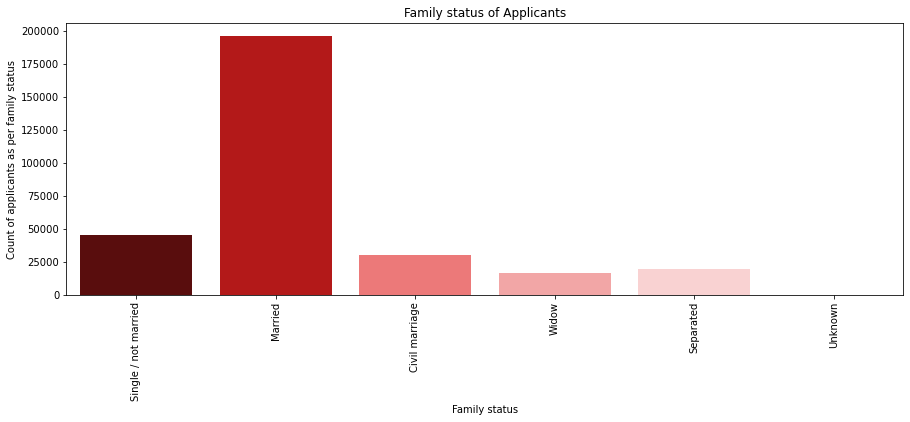

In [66]:
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_FAMILY_STATUS', data=datasets["application_train"], palette=["#660000","#cc0000","#ff6666","#ff9999","#ffcccc"]);
plt.title('Family status of Applicants');
plt.xlabel("Family status")
plt.ylabel("Count of applicants as per family status")
plt.xticks(rotation=90);

The highest number of applicants are married and the second highest number of applicants are single/not married followed by civil marriage applicants.


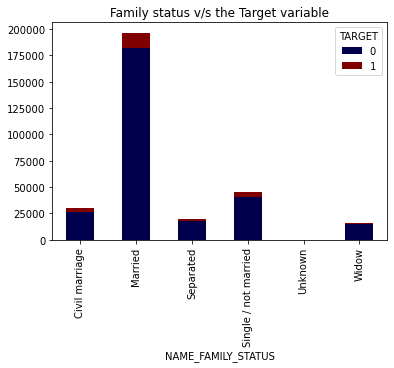

In [67]:
plot2 = pd.crosstab(dataset['NAME_FAMILY_STATUS'],dataset['TARGET']).plot.bar(stacked=True,colormap = 'seismic')
plt.title('Family status v/s the Target variable')
plt.show()

Adding to the above observation, the highest number of applicants who repayed are married.

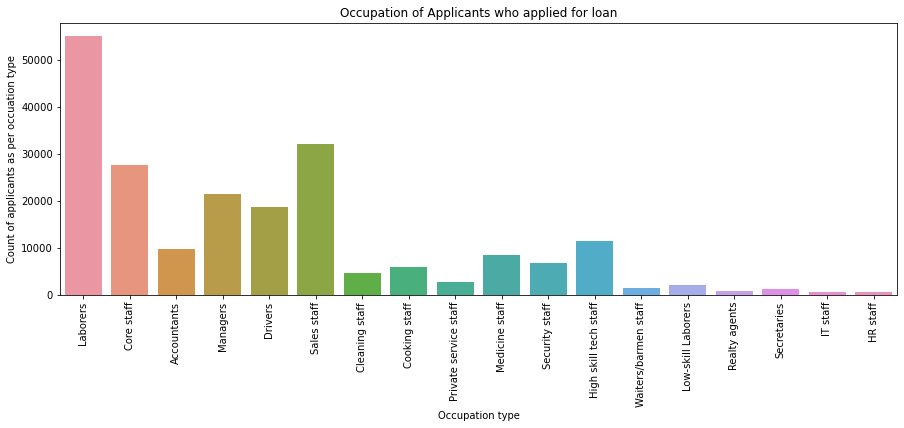

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Occupation of Applicants who applied for loan');
plt.xlabel("Occupation type")
plt.ylabel("Count of applicants as per occuation type")
plt.xticks(rotation=90);

The highest number of applicants are laborers and the second highest applicants are sales staff.

In [69]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'iframe'
from plotly.offline import init_notebook_mode, iplot
temp = dataset["OCCUPATION_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(dataset["TARGET"][dataset["OCCUPATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(dataset["TARGET"][dataset["OCCUPATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES',
    marker_color='khaki'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO',
    marker_color='firebrick'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Occupation of Applicant's in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    plot_bgcolor='white',
    xaxis=dict(
        title='Occupation of Applicant\'s',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

![plotly-2](images/plotly-2.png)

Majority of the applicants have occupation type 'Labourers'. Labourers who defaulted are 2.76% and labourers who repayed are 23.37% of the entire data.

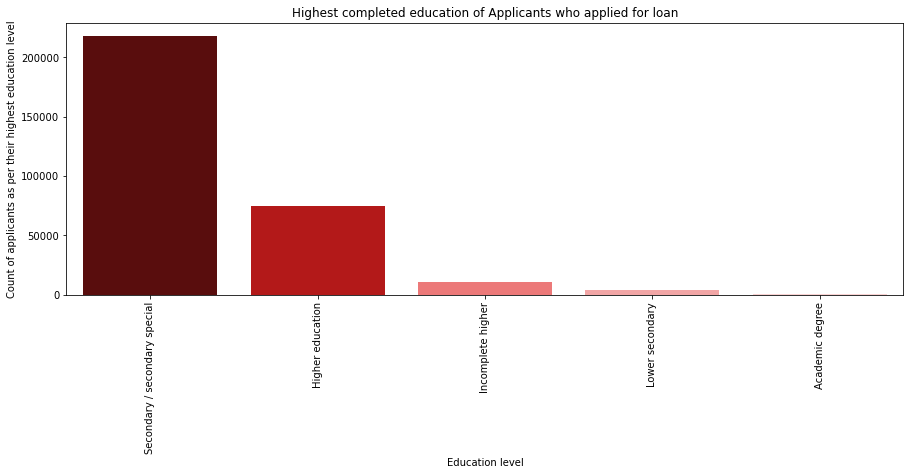

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_EDUCATION_TYPE', data=dataset, palette=["#660000","#cc0000","#ff6666","#ff9999","#ffcccc"]);
plt.title('Highest completed education of Applicants who applied for loan');
plt.xlabel("Education level")
plt.ylabel("Count of applicants as per their highest education level")
plt.xticks(rotation=90);

The highest number of applicants have studied till the secondary level and the second highest applicants have completed higher education.


<Figure size 1080x360 with 0 Axes>

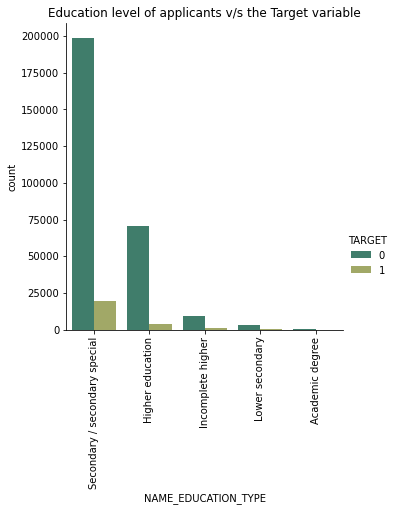

In [71]:
plt.figure(figsize=(15,5))
sns.catplot(x='NAME_EDUCATION_TYPE',hue='TARGET',data=dataset,kind="count",palette='gist_earth')
plt.title('Education level of applicants v/s the Target variable')
plt.xticks(rotation = 90)
plt.show()

Majority of the applicants have secondary/secondary specaial education. Of this majority roughly 10% are defaulters.

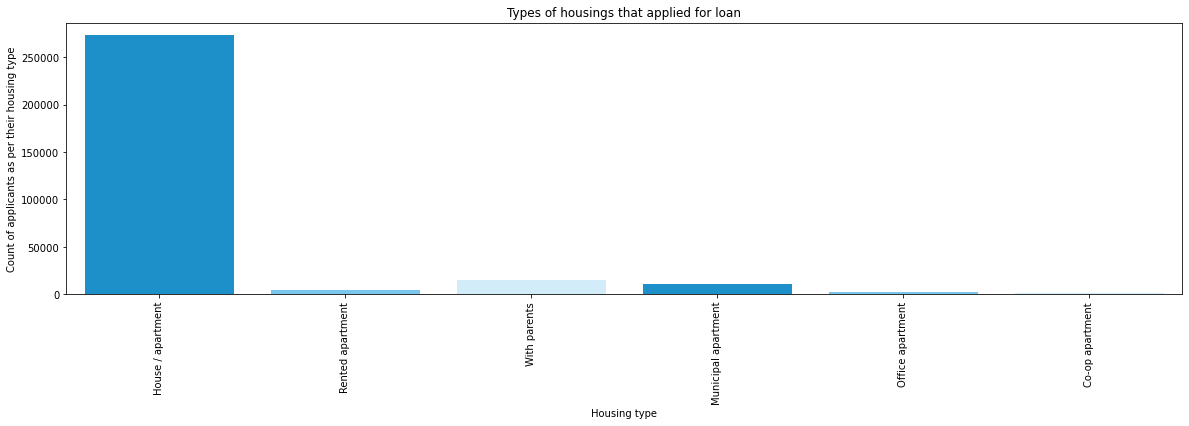

In [72]:
plt.figure(figsize=(20,5))
sns.countplot(x='NAME_HOUSING_TYPE', data=datasets["application_train"], palette=['#0099e6',"#66ccff","#cceeff"]);
plt.title('Types of housings that applied for loan');
plt.xlabel("Housing type")
plt.ylabel("Count of applicants as per their housing type")
plt.xticks(rotation=90);

The highest housing type of applicants is house/apartment by almost 80%.

In [73]:
temp = dataset["NAME_HOUSING_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(dataset["TARGET"][dataset["NAME_HOUSING_TYPE"]==val] == 1))
    temp_y0.append(np.sum(dataset["TARGET"][dataset["NAME_HOUSING_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = (temp_y1 / temp.sum()) * 100,
    name='YES',
    marker_color='black'
)
trace2 = go.Bar(
    x = temp.index,
    y = (temp_y0 / temp.sum()) * 100, 
    name='NO',
    marker_color='olive'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %",
    #barmode='stack',
    width = 1000,
    plot_bgcolor='white',
    xaxis=dict(
        title='types of house',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

![plotly](images/plotly-1.png)

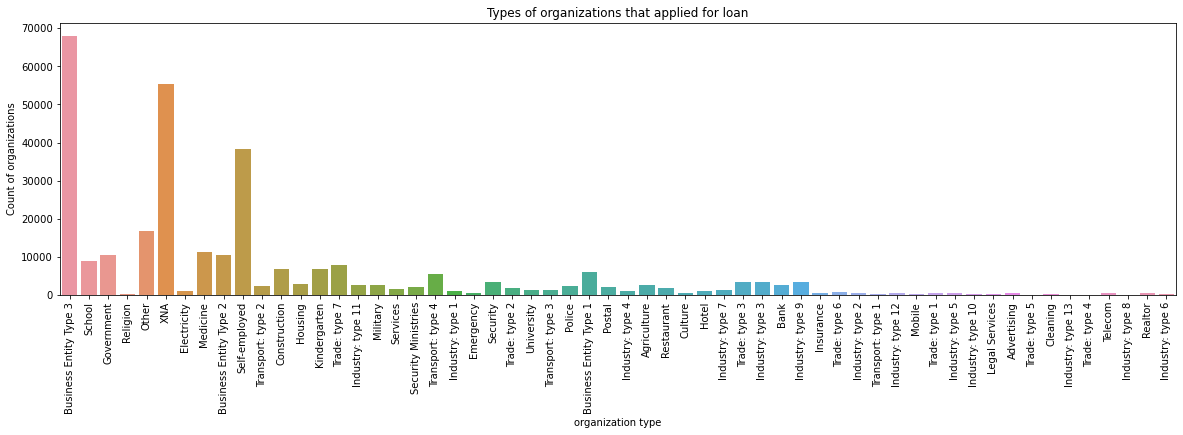

In [74]:
plt.figure(figsize=(20,5))
sns.countplot(x='ORGANIZATION_TYPE', data=datasets["application_train"]);
plt.title('Types of organizations that applied for loan');
plt.xlabel("organization type")
plt.ylabel("Count of organizations")
plt.xticks(rotation=90);


The highest number of organizations are of type business entity type 3 and the second highest number of organizations are of type XNA.


In [75]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=3):
    
    i = 0
    t1 = dataset.loc[dataset['TARGET'] != 0]
    t0 = dataset.loc[dataset['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,1,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,1,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.title('{} density plot for Target (0/1)'.format(feature))
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 432x288 with 0 Axes>

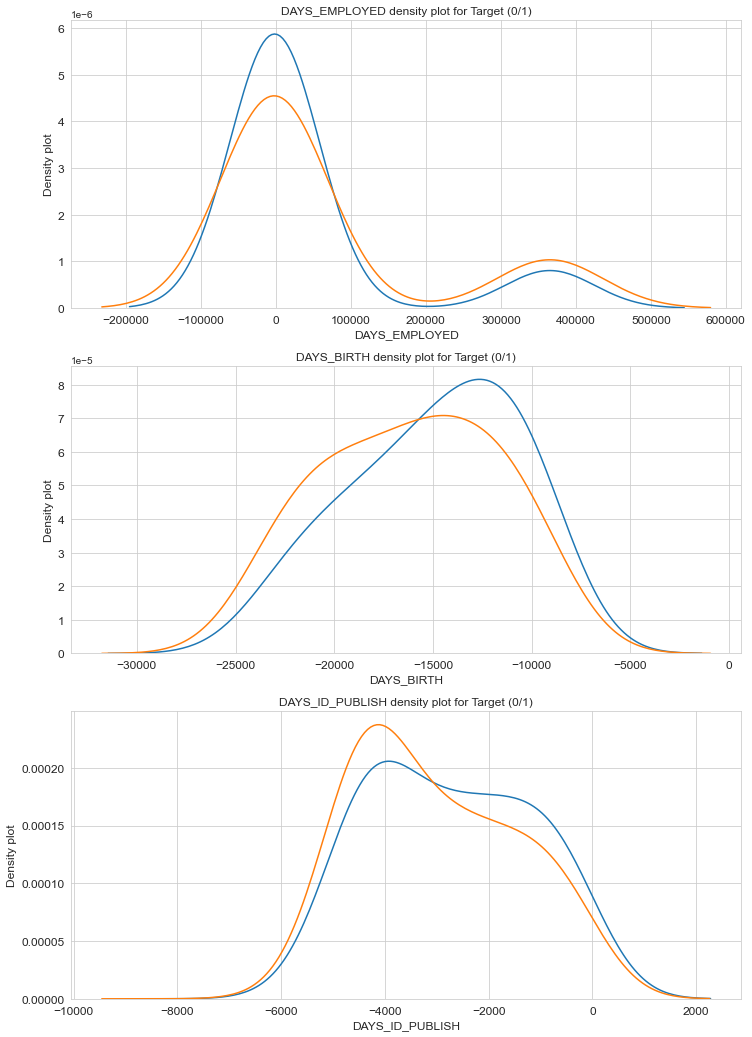

In [76]:
var = ['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

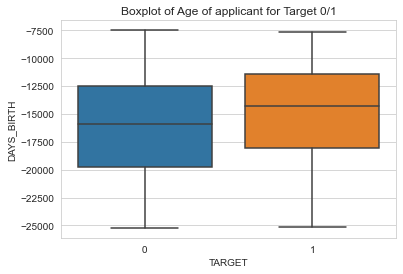

In [77]:
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=dataset)
plt.title('Boxplot of Age of applicant for Target 0/1')
plt.show()

The median age of defaulters is lesser than that of the applicants that repayed the loan. The ages of applicants who repayed the loan range from 34 to 52. The age range for defaulters is from 30 to 49.

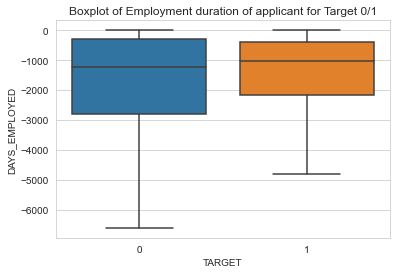

In [78]:
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=dataset, showfliers=False)
plt.title('Boxplot of Employment duration of applicant for Target 0/1')
plt.show()

The range of days of employement before application of defaulters is smaller than those who repayed. The median years of employement for defaulters is 2.7 years whereas of those who repayed is 3.2 years.

### Previous Application Dataset

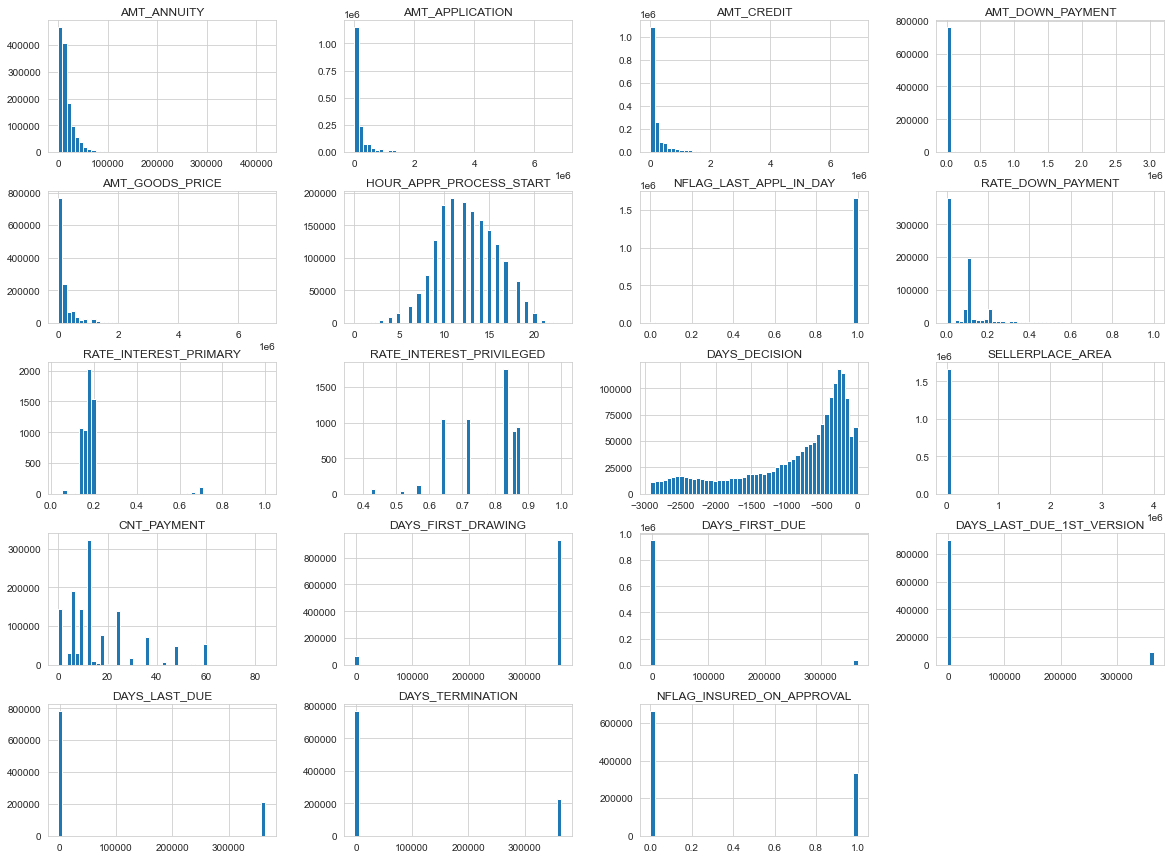

In [79]:
import matplotlib.pyplot as plt
previous_application.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).hist(bins=50, figsize=(20,15))
plt.show()

The histogram describes the distribution of all numerical features of previous application.

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

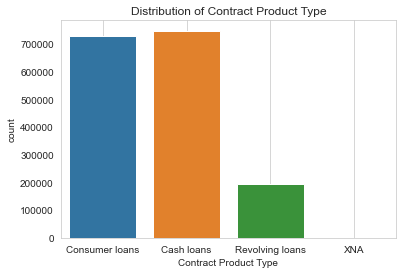

In [80]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=previous_application);
plt.title('Distribution of Contract Product Type')
plt.xlabel('Contract Product Type')
plt.grid()
previous_application['NAME_CONTRACT_TYPE'].value_counts()

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

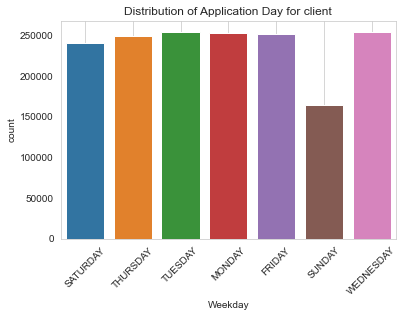

In [81]:
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=previous_application);
plt.title('Distribution of Application Day for client')
plt.xlabel('Weekday')
plt.xticks(rotation=45);
plt.grid()
previous_application['WEEKDAY_APPR_PROCESS_START'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

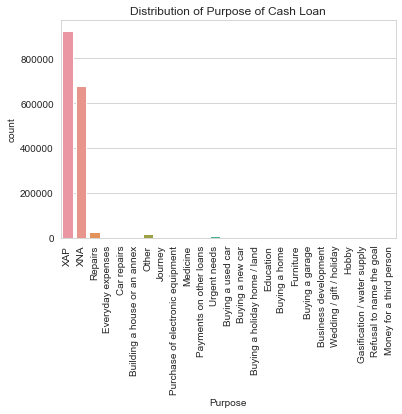

In [82]:
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=previous_application);
plt.title('Distribution of Purpose of Cash Loan')
plt.xlabel('Purpose')
plt.xticks(rotation=90);
previous_application['NAME_CASH_LOAN_PURPOSE'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

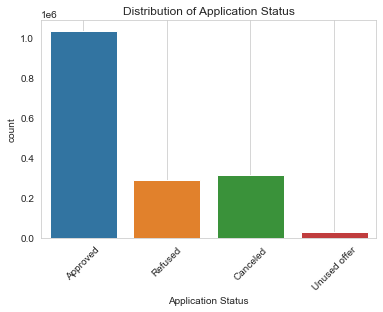

In [83]:
sns.countplot(x='NAME_CONTRACT_STATUS', data=previous_application);
plt.title('Distribution of Application Status')
plt.xlabel('Application Status')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_CONTRACT_STATUS'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

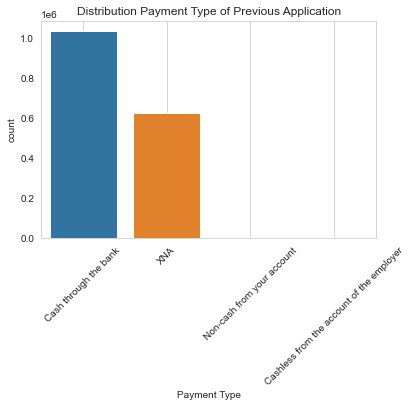

In [84]:
sns.countplot(x='NAME_PAYMENT_TYPE', data=previous_application);
plt.title('Distribution Payment Type of Previous Application')
plt.xlabel('Payment Type')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_PAYMENT_TYPE'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

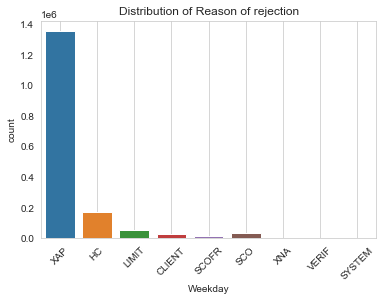

In [85]:
sns.countplot(x='CODE_REJECT_REASON', data=previous_application);
plt.title('Distribution of Reason of rejection')
plt.xlabel('Weekday')
plt.xticks(rotation=45);
plt.grid()
previous_application['CODE_REJECT_REASON'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

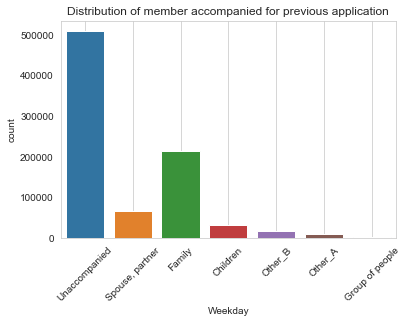

In [86]:
sns.countplot(x='NAME_TYPE_SUITE', data=previous_application);
plt.title('Distribution of member accompanied for previous application')
plt.xlabel('Weekday')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_TYPE_SUITE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

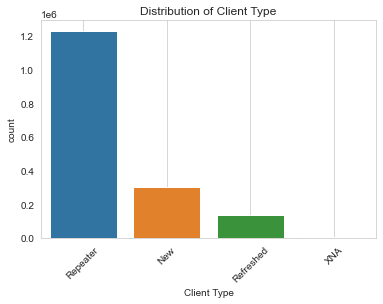

In [87]:
sns.countplot(x='NAME_CLIENT_TYPE', data=previous_application);
plt.title('Distribution of Client Type')
plt.xlabel('Client Type')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_CLIENT_TYPE'].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

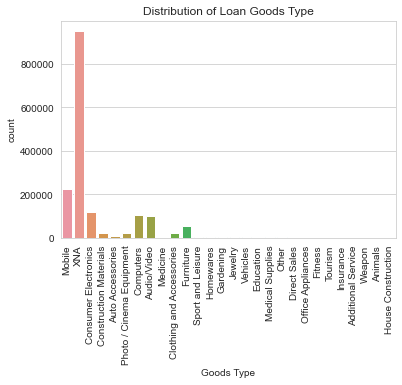

In [88]:
sns.countplot(x='NAME_GOODS_CATEGORY', data=previous_application)
plt.title('Distribution of Loan Goods Type')
plt.xlabel('Goods Type')
plt.xticks(rotation=90)
previous_application['NAME_GOODS_CATEGORY'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

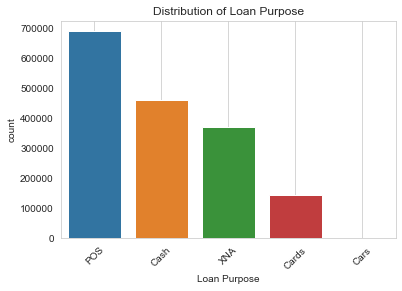

In [89]:
sns.countplot(x='NAME_PORTFOLIO', data=previous_application);
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

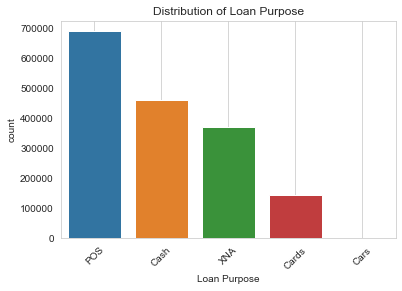

In [90]:
sns.countplot(x='NAME_PORTFOLIO', data=previous_application);
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_PORTFOLIO'].value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

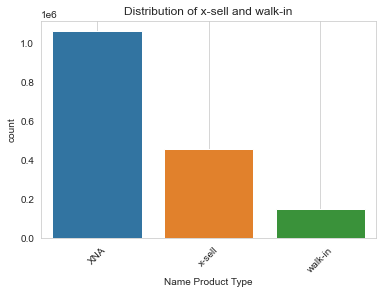

In [91]:
sns.countplot(x='NAME_PRODUCT_TYPE', data=previous_application);
plt.title('Distribution of x-sell and walk-in')
plt.xlabel('Name Product Type')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_PRODUCT_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

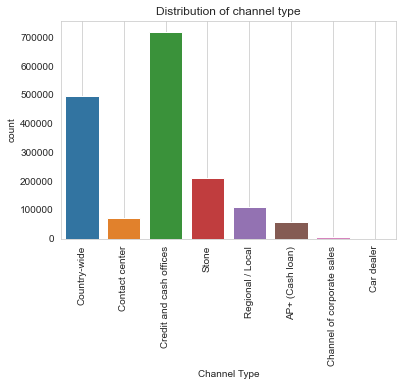

In [92]:
sns.countplot(x='CHANNEL_TYPE', data=previous_application);
plt.title('Distribution of channel type')
plt.xlabel('Channel Type')
plt.xticks(rotation=90);
plt.grid()
previous_application['CHANNEL_TYPE'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

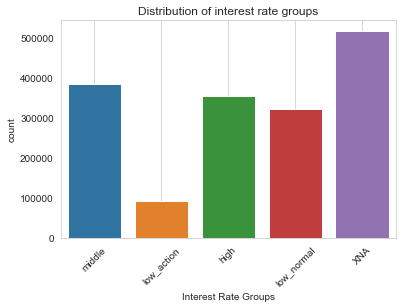

In [93]:
sns.countplot(x='NAME_YIELD_GROUP', data=previous_application);
plt.title('Distribution of interest rate groups')
plt.xlabel('Interest Rate Groups')
plt.xticks(rotation=45);
plt.grid()
previous_application['NAME_YIELD_GROUP'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

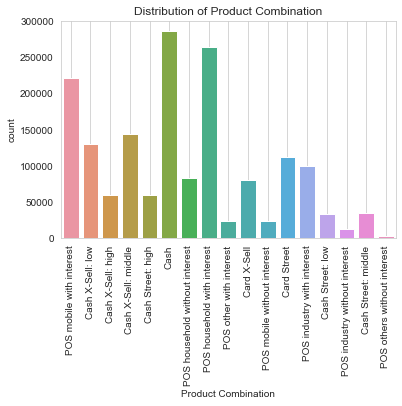

In [94]:
sns.countplot(x='PRODUCT_COMBINATION', data=previous_application);
plt.title('Distribution of Product Combination')
plt.xlabel('Product Combination')
plt.xticks(rotation=90);
plt.grid()
previous_application['PRODUCT_COMBINATION'].value_counts()

The above plots describe the distribtion of important categorical features in previous application dataset.

In [95]:
application_train = datasets['application_train']
# Merging Previous Application data with main table
prev_application_train = previous_application.merge(application_train, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')


In [96]:
prev_application_with_target = prev_application_train.filter(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'TARGET'], axis=1)

prev_application_with_target.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 31 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   SK_ID_CURR                   1413701 non-null  int64  
 2   AMT_APPLICATION              1413701 non-null  float64
 3   AMT_DOWN_PAYMENT             664161 non-null   float64
 4   NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 5   RATE_DOWN_PAYMENT            664161 non-null   float64
 6   RATE_INTEREST_PRIMARY        4791 non-null     float64
 7   RATE_INTEREST_PRIVILEGED     4791 non-null     float64
 8   DAYS_DECISION                1413701 non-null  int64  
 9   SELLERPLACE_AREA             1413701 non-null  int64  
 10  CNT_PAYMENT                  1106488 non-null  float64
 11  DAYS_FIRST_DRAWING           852595 non-null   float64
 12  DAYS_FIRST_DUE               852595 non-nu

In [97]:
corr_matrix = prev_application_with_target.corr()
display(corr_matrix)
corr_matrix["ABS_TARGET"] = np.abs(corr_matrix["TARGET"])
display(corr_matrix)
corr_matrix.sort_values("ABS_TARGET", ascending=False, inplace=True)
display(corr_matrix["TARGET"])

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
SK_ID_PREV,1.000000,0.000147,0.003747,-0.000576,-0.002486,-0.003212,0.006845,-0.022136,0.018228,-0.000786,0.015175,-0.000985,-0.000640,0.000546,0.001103,0.000848,0.004226,0.002009
SK_ID_CURR,0.000147,1.000000,-0.000009,0.000625,-0.000634,0.002314,0.037759,-0.017274,-0.000410,0.001370,-0.000318,-0.001871,-0.001004,0.000399,-0.000288,-0.000161,0.001295,-0.001246
AMT_APPLICATION,0.003747,-0.000009,1.000000,0.479394,0.004936,-0.074915,0.133360,-0.204281,0.140750,-0.007170,0.683056,0.078103,-0.048497,-0.087426,0.182389,0.157535,0.261690,-0.005583
AMT_DOWN_PAYMENT,-0.000576,0.000625,0.479394,1.000000,0.001274,0.476042,0.023258,-0.109834,-0.025462,0.003455,0.032581,-0.001040,-0.013051,-0.001439,-0.033102,-0.032433,-0.042842,-0.016918
NFLAG_LAST_APPL_IN_DAY,-0.002486,-0.000634,0.004936,0.001274,1.000000,0.004129,0.010572,0.027077,0.016550,0.000847,0.063160,-0.000183,-0.001581,-0.001708,-0.003098,-0.001504,-0.007459,-0.002887
RATE_DOWN_PAYMENT,-0.003212,0.002314,-0.074915,0.476042,0.004129,1.000000,-0.107681,-0.095553,-0.211102,-0.006346,-0.280852,-0.006104,-0.038654,-0.012348,-0.149424,-0.147360,-0.019091,-0.026111
RATE_INTEREST_PRIMARY,0.006845,0.037759,0.133360,0.023258,0.010572,-0.107681,1.000000,-0.024976,0.009672,0.170263,-0.017092,NaN,-0.019939,-0.001615,-0.009065,-0.009848,0.282928,-0.001470
RATE_INTEREST_PRIVILEGED,-0.022136,-0.017274,-0.204281,-0.109834,0.027077,-0.095553,-0.024976,1.000000,0.677183,-0.070859,-0.044796,NaN,0.165434,0.033320,0.410534,0.417225,-0.059288,0.028640
DAYS_DECISION,0.018228,-0.000410,0.140750,-0.025462,0.016550,-0.211102,0.009672,0.677183,1.000000,-0.016879,0.253460,-0.006066,0.178028,0.082870,0.449922,0.399752,-0.029570,0.039901
SELLERPLACE_AREA,-0.000786,0.001370,-0.007170,0.003455,0.000847,-0.006346,0.170263,-0.070859,-0.016879,1.000000,-0.009594,0.006868,-0.002307,-0.007218,-0.006140,-0.006508,-0.017205,-0.002539


,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,ABS_TARGET
SK_ID_PREV,1.000000,0.000147,0.003747,-0.000576,-0.002486,-0.003212,0.006845,-0.022136,0.018228,-0.000786,0.015175,-0.000985,-0.000640,0.000546,0.001103,0.000848,0.004226,0.002009,0.002009
SK_ID_CURR,0.000147,1.000000,-0.000009,0.000625,-0.000634,0.002314,0.037759,-0.017274,-0.000410,0.001370,-0.000318,-0.001871,-0.001004,0.000399,-0.000288,-0.000161,0.001295,-0.001246,0.001246
AMT_APPLICATION,0.003747,-0.000009,1.000000,0.479394,0.004936,-0.074915,0.133360,-0.204281,0.140750,-0.007170,0.683056,0.078103,-0.048497,-0.087426,0.182389,0.157535,0.261690,-0.005583,0.005583
AMT_DOWN_PAYMENT,-0.000576,0.000625,0.479394,1.000000,0.001274,0.476042,0.023258,-0.109834,-0.025462,0.003455,0.032581,-0.001040,-0.013051,-0.001439,-0.033102,-0.032433,-0.042842,-0.016918,0.016918
NFLAG_LAST_APPL_IN_DAY,-0.002486,-0.000634,0.004936,0.001274,1.000000,0.004129,0.010572,0.027077,0.016550,0.000847,0.063160,-0.000183,-0.001581,-0.001708,-0.003098,-0.001504,-0.007459,-0.002887,0.002887
RATE_DOWN_PAYMENT,-0.003212,0.002314,-0.074915,0.476042,0.004129,1.000000,-0.107681,-0.095553,-0.211102,-0.006346,-0.280852,-0.006104,-0.038654,-0.012348,-0.149424,-0.147360,-0.019091,-0.026111,0.026111
RATE_INTEREST_PRIMARY,0.006845,0.037759,0.133360,0.023258,0.010572,-0.107681,1.000000,-0.024976,0.009672,0.170263,-0.017092,NaN,-0.019939,-0.001615,-0.009065,-0.009848,0.282928,-0.001470,0.001470
RATE_INTEREST_PRIVILEGED,-0.022136,-0.017274,-0.204281,-0.109834,0.027077,-0.095553,-0.024976,1.000000,0.677183,-0.070859,-0.044796,NaN,0.165434,0.033320,0.410534,0.417225,-0.059288,0.028640,0.028640
DAYS_DECISION,0.018228,-0.000410,0.140750,-0.025462,0.016550,-0.211102,0.009672,0.677183,1.000000,-0.016879,0.253460,-0.006066,0.178028,0.082870,0.449922,0.399752,-0.029570,0.039901,0.039901
SELLERPLACE_AREA,-0.000786,0.001370,-0.007170,0.003455,0.000847,-0.006346,0.170263,-0.070859,-0.016879,1.000000,-0.009594,0.006868,-0.002307,-0.007218,-0.006140,-0.006508,-0.017205,-0.002539,0.002539


TARGET                       1.000000
DAYS_DECISION                0.039901
DAYS_FIRST_DRAWING          -0.031154
CNT_PAYMENT                  0.030480
RATE_INTEREST_PRIVILEGED     0.028640
RATE_DOWN_PAYMENT           -0.026111
DAYS_LAST_DUE_1ST_VERSION    0.018021
DAYS_LAST_DUE                0.017522
DAYS_TERMINATION             0.016981
AMT_DOWN_PAYMENT            -0.016918
DAYS_FIRST_DUE              -0.006651
AMT_APPLICATION             -0.005583
NFLAG_LAST_APPL_IN_DAY      -0.002887
SELLERPLACE_AREA            -0.002539
SK_ID_PREV                   0.002009
RATE_INTEREST_PRIMARY       -0.001470
SK_ID_CURR                  -0.001246
NFLAG_INSURED_ON_APPROVAL    0.000653
Name: TARGET, dtype: float64

Text(0.5, 1.0, 'Previous application features correlated with Target')

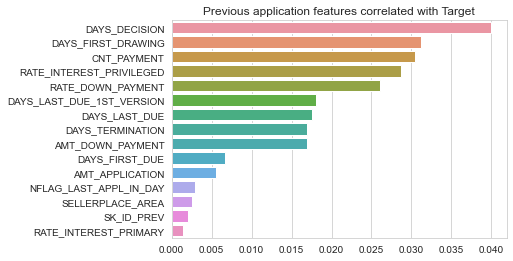

In [98]:
x=corr_matrix['TARGET'].drop('TARGET').abs().sort_values(ascending=False).nlargest(n=15)
ax = sns.barplot(y=x.index, x=x.values)
ax.set_title("Previous application features correlated with Target")

The first two highly correlated features with Target are DAYS_DECISION and DAYS_FIRST_DRAWING. DAYS_DECISION is the duration between previous and new loan application. DAYS_FIRST_DRAWING is duration of first debursement after application.

### Bureau Dataset

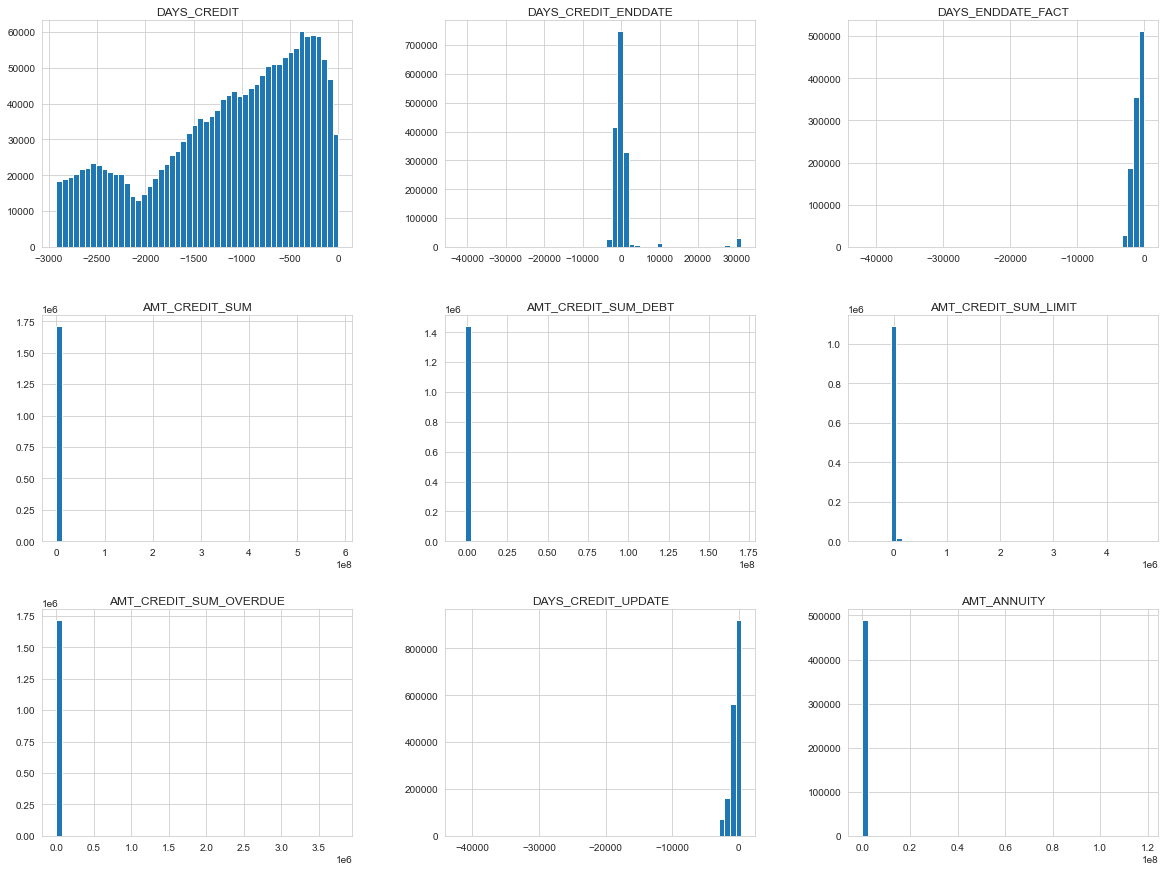

In [99]:
bureau.drop(['SK_ID_BUREAU', 'SK_ID_CURR', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG'], axis = 1).hist(bins=50, figsize=(20,15))
plt.show()

The histograms describe the distribution of numerical features in bureau dataset.Days Credit feature descirbes how many days before current application did client apply for Credit Bureau credit. Its has right skewed distribution suggesting that application to Credit Bureau was done within 500 days.

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

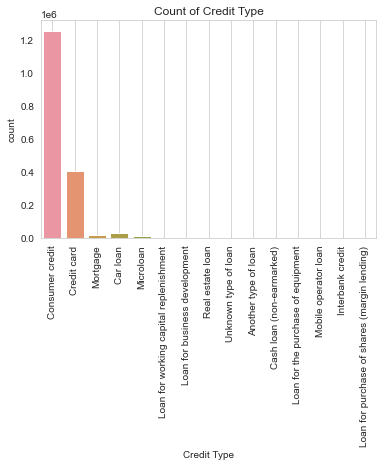

In [100]:
sns.countplot(x='CREDIT_TYPE', data=bureau);
plt.title('Count of Credit Type')
plt.xlabel('Credit Type')
plt.xticks(rotation=90);
plt.grid()
bureau['CREDIT_TYPE'].value_counts()

The plot shows that the Consumer Credit Count is the highest followed by Credit Card.

### Bureau Balance Dataset

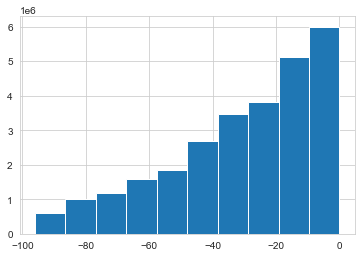

In [101]:
bureau_balance['MONTHS_BALANCE'].hist()
plt.show()

The distibtuion is left skewed. This feature indicates month of balance relative to application date.

### POS CASH Balance Dataset

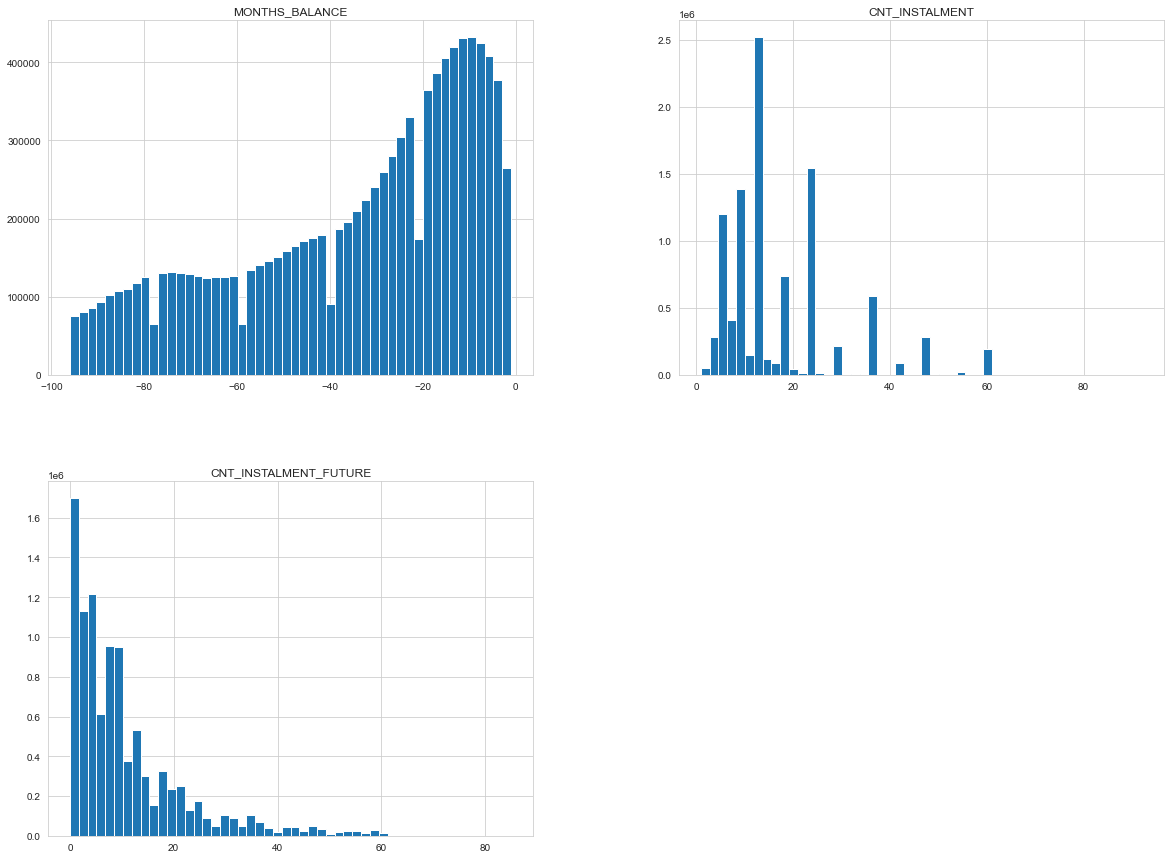

In [102]:
POS_CASH_balance.drop(['SK_ID_PREV', 'SK_ID_CURR', 'SK_DPD', 'SK_DPD_DEF'], axis = 1).hist(bins=50, figsize=(20,15))
plt.show()

The histograms depict distribution for numerical features of POS CASH balance dataset. CNT_INSTALMENT_FUTURE describes the installments still left to pay from pervious credit. This feature can play vital role in prediction.

### Installment Payments Dataset

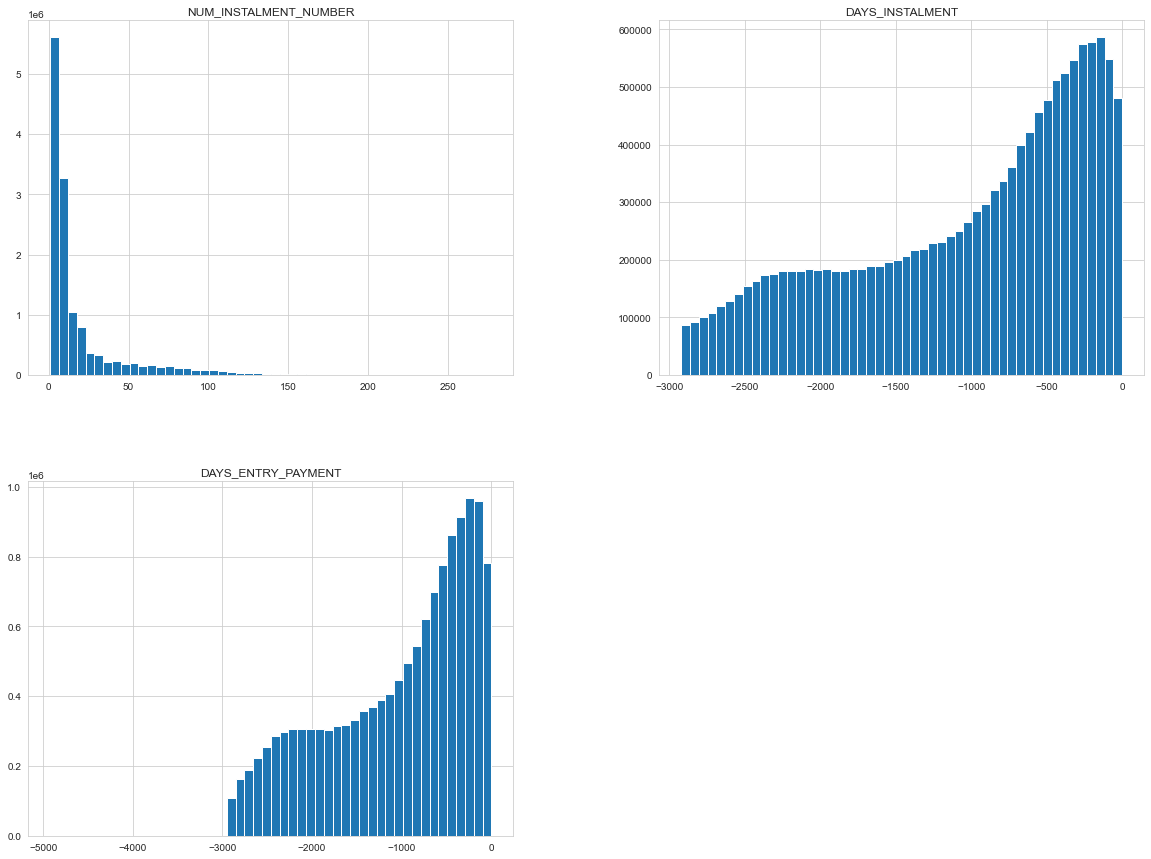

In [103]:
installments_payments.drop(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'AMT_INSTALMENT', 'AMT_PAYMENT'], axis = 1).hist(bins=50, figsize=(20,15))
plt.show()

The above histogram depicts the distribution of numerical features of Installment payment dataset. The NUM_INSTALMENT_NUMBER depicts the number of instalments for each loan application and it is a right skewed distribution indicating that most loans have less than 50 installments.

### Credit Card Balance Dataset

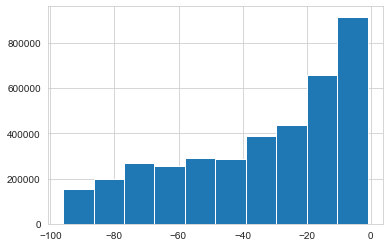

In [104]:
credit_card_balance['MONTHS_BALANCE'].hist()
plt.show()

The MONTHS_BALANCE feature has left skewed distribution. This feature indicates month of balance relative to application date where -1 indicates freshest balance date. 

<h1>RESULTS OF EXPLORATORY DATA ANALYSIS</h1>

The following observations were made about the data distribution and the relations of the input variable with the target variable.
These results are derived from the various visualizations made using the matplotlib, seaborn and pyplot libraries in python.

![Screenshot%202021-11-16%20at%2021.17.36.png](images/results-eda.png)
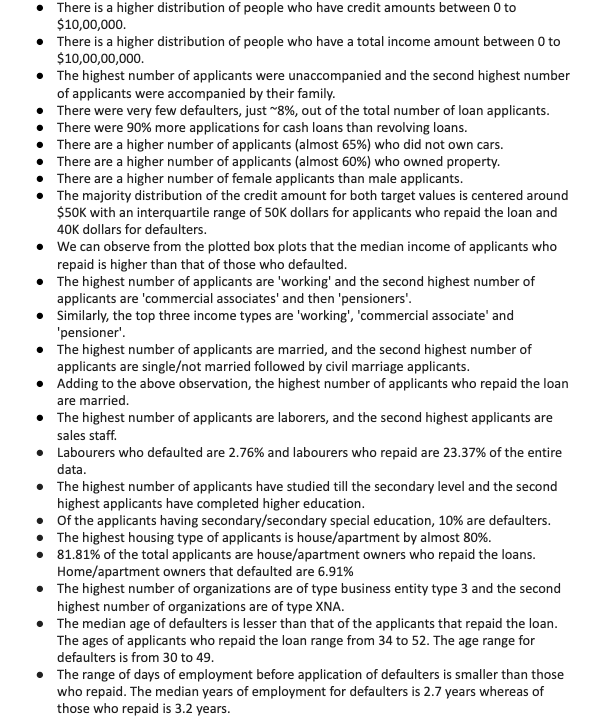

# Pipeline



### Join previous applications table with applications_train and applications_test

In [105]:
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_ops = ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"], as_index=False).agg({ft:self.agg_ops for ft in self.features})
        result.columns = result.columns.map(lambda ct: '_'.join([x for x in ct if x != '']))
        
        if 'AMT_APPLICATION' in features:
            result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"


appsDF = datasets['previous_application']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
# features = ['AMT_ANNUITY', 'AMT_APPLICATION']    
prevApps_aggregated = prevAppsFeaturesAggregater(features).transform(appsDF)

Attributes from Previous Applications (with min, max and mean aggregations) (15*3=45):
- AMT_ANNUITY
- AMT_APPLICATION
- AMT_CREDIT
- AMT_DOWN_PAYMENT
- AMT_GOODS_PRICE
- RATE_DOWN_PAYMENT
- RATE_INTEREST_PRIMARY
- RATE_INTEREST_PRIVILEGED
- DAYS_DECISION
- CNT_PAYMENT
- DAYS_FIRST_DRAWING
- DAYS_FIRST_DUE
- DAYS_LAST_DUE_1ST_VERSION
- DAYS_LAST_DUE
- DAYS_TERMINATION

Merge the aggreated features from previous_application into application_train using the 'SK_ID_CURR'

In [106]:
appTrain = datasets['application_train']
appTest = datasets['application_test']

appTrain = appTrain.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
appTest = appTest.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

### Prepate train, validation and test datasets

In [107]:
y_train = appTrain['TARGET']
X_train = appTrain
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= appTest

### Prepare Pipeline and train

Numerical Attributes (7):
- AMT_INCOME_TOTAL
- AMT_CREDIT
- DAYS_EMPLOYED
- DAYS_BIRTH
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3


Categorical Attributes (6):
- CODE_GENDER
- FLAG_OWN_REALTY
- FLAG_OWN_CAR
- NAME_CONTRACT_TYPE
- NAME_EDUCATION_TYPE
- OCCUPATION_TYPE
- NAME_INCOME_TYPE


In total there are 60 features, 53 numerical features and 7 categorical features.

A numerical pipeline is created with imputer to replace missing values with feature mean and standardize the data for the numerical attributes. A categorical pipeline with imputer to replace the missing values with a constant string “missing” and then one hot encode each categorical feature is made. A union pipeline to merge the numerical and categorical pipeline is created.

In [108]:
# the numeric features we wish to consider and the aggregated features from 'previous_application'
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3'] + list(prevApps_aggregated.columns[1:])

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

selected_features = num_attribs + cat_attribs

Create a full pipeline by adding Logistic Regression and train it 

In [109]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)

CPU times: user 14.7 s, sys: 2.09 s, total: 16.8 s
Wall time: 3.14 s


In [117]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline_with_predictor

Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['AMT_INCOME_TOTAL',
                                                                                                     'AMT_CREDIT',
                                                                                                     'DAYS_EMPLOYED',
                                                                                                     'DAYS_BIRTH',
                                                                                                     'EXT_SOURCE_1',
                                                                                                     'EXT_SOURCE_2',
                                                                                                     'EXT_SOURCE_3',
                                                                                                     'AMT_ANNUITY_min',
                                                                                                     'AMT_ANNUITY_max',
                                                                                                     'AMT_ANNUITY_mean',
                                                                                                     'AMT_APPLICATION_min',
                                                                                                     'AMT_APPLICATION_max',
                                                                                                     'AMT...
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['CODE_GENDER',
                                                                                                     'FLAG_OWN_REALTY',
                                                                                                     'FLAG_OWN_CAR',
                                                                                                     'NAME_CONTRACT_TYPE',
                                                                                                     'NAME_EDUCATION_TYPE',
                                                                                                     'OCCUPATION_TYPE',
                                                                                                     'NAME_INCOME_TYPE'])),
                                                                 ('imputer',
                                                                  SimpleImputer(fill_value='missing',
                                                                                strategy='constant')),
                                                                 ('ohe',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse=False))]))])),
                ('linear', LogisticRegression())])

![image.png](images/pipeline.png)

### Evaluation




Evaluate the full pipeline uon validation and test sets using accuracy and AUC metrics

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

In [112]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC
0,Baseline_60_features,0.9198,0.9195,0.9158,0.747,0.7479,0.7466


ROC for base pipeline

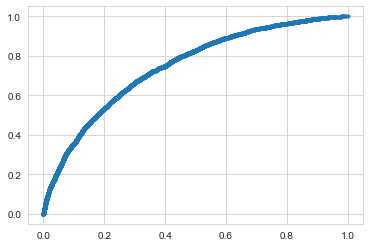

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, marker='.', label='Baseline Logistic Regression with 60 features')

<h1> Loss Function</h1>

Cross Entropy Loss with L2 Regularization

$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} -y_i log(h_{\theta}(x^{(i)})) - (1-y_i)log(1-h_{\theta}(x^{(i)})) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$

<h1>RESULTS OF BASE PIPELINE</h1>

In total there are 60 features, 53 numerical features and 7 categorical features.<br>

A numerical pipeline is created with imputer to replace missing values with feature mean and standardize the data for the numerical attributes. A categorical pipeline with imputer to replace the missing values with a constant string “missing” and then one hot encode each categorical feature is made. A union pipeline to merge the numerical and categorical pipeline is created.<br>

The data is then split into train, valid and testset in the ratio of 0.6, 0.15, and 0.15 after shuffling. A base estimator with Linear regression is made using the above data preparation pipeline. <br>

The metrics used to evaluate the base pipeline built on 60 features are AUC and accuracies for the train test and validation dataset.

<h1> Kaggle Submission</h1>

In [114]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores
submit_df.to_csv("baseline_LR.csv",index=False)

Modeling Pipelines
- A visualization of the modeling pipeline (s) and subpipelines if necessary
- Families of input features and count per family
- Number of input features
- Loss function used (data loss and regularization parts) in latex
- Number of experiments conducted
- Experiment table with the following details per experiment:
  - Baseline experiment
  - The families of input features used
  - For train/valid/test record the following in a Pandas DataFrame:
  - Accuracy
  - AUC/ROC


<h1>RESULTS OF THE KAGGLE SUBMISSION:</h1><br>

Upon submitting the base pipeline code to Kaggle,  we received a score of 0.73319 .


![Screen%20Shot%202021-11-16%20at%205.04.12%20PM.png](images/kaggle-score.png)

<h1>Conclusion:</h1>

In this phase we have performed three main tasks, i.e Exploratory data analysis, creating and fitting a base pipeline and submitting our results to Kaggle.<br> 

In the EDA task we have performed visual and textual analysis of the input feature’s distribution and their relation with the target variable. Some of the features with high correlation are external sources 1,2,and 3, age of the applicant, days employed. The count and percentage of missing values is high in ext_source_1 which is a highly correlated variable to the target.<br>
Our EDA findings show evidence for a higher loan repayment given a candidate with credit amount between 0 and 100K, having an age range of 34-52, is married and is employed for more than 3 years.<br>

In the base pipeline task we have used a Logistic regression model and evaluated the pipeline performance with the AUC and accuracy metrics.<br>
The test accuracy for the Logistic Regression model is 91.58%. The test AUC is 0.7466.<br>

Finally we have submitted our results to Kaggle with a score of 0.73319<br>

Our next steps include:<br>
1. Additional feature engineering for applications dataset as well as other datasets. <br>
2. Explore merging aggregates of features from other datasets such as "bureau_balance", "bureau" with applications and "cash", "installments", and "credit" with "previous".<br>
3. Do an analysis of feature importance and remove highly correlated attributes and select the vital features using cross validation.<br>
4. Train models and perform hyperparameter tuning and combine them with ensemble methods.<br>
